In [1]:
from math import ceil
from fastai.vision import *
from fastai.callbacks.one_cycle import OneCycleScheduler

## Simplest case on MNIST_SAMPLE

dataset only contains 3 and 7 for demo purpose

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [24]:
print(f"# train sapmles: {len(data.train_ds)}")
print(f"# val sapmles: {len(data.valid_ds)}")
print(f"batch size: {data.batch_size}")
print(f"# iterations per epoch: {ceil(len(data.train_ds) / data.batch_size)}")

# train sapmles: 12396
# val sapmles: 2038
batch size: 64
# iterations per epoch: 194


In [3]:
model = simple_cnn((3,16,16,2))

In [4]:
learn = Learner(data, model)

In [10]:
learn.metrics=[accuracy]
cb = OneCycleScheduler(learn, lr_max=0.01)
learn.fit(1, callbacks=cb)

epoch,train_loss,valid_loss,accuracy,time
0,0.070433,0.053380,0.981845,00:01


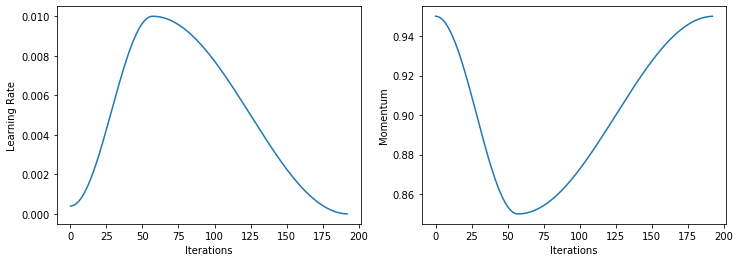

In [11]:
learn.recorder.plot_lr(show_moms=True)

## Another example

In [28]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.225070,0.131308,0.956820,00:03


## My Custom Data

In [2]:
data = ImageList\
    .from_folder("/data2/datasets/clobotics/ccth/images/cropped/versions/train20200129_val20200117_test20191122/for-image-quality-model/round1")\
    .split_by_rand_pct(valid_pct=0.2, seed=59)\
    .label_from_func(lambda p: str(p.parent.parent.stem))\
    .transform(size=224, resize_method=ResizeMethod.PAD, padding_mode='zeros')\
    .databunch(bs=128, num_workers=4) \
    .normalize(imagenet_stats)

In [3]:
data

ImageDataBunch;

Train: LabelList (4908 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lose_discriminative_feature,lose_discriminative_feature,lose_discriminative_feature,lose_discriminative_feature,lose_discriminative_feature
Path: /data2/datasets/clobotics/ccth/images/cropped/versions/train20200129_val20200117_test20191122/for-image-quality-model/round1;

Valid: LabelList (1226 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
good,good,good,good,good
Path: /data2/datasets/clobotics/ccth/images/cropped/versions/train20200129_val20200117_test20191122/for-image-quality-model/round1;

Test: None

In [4]:
data.train_ds.to_df().y.value_counts()

good                           4185
lose_discriminative_feature     512
blur_or_low_resolution          211
Name: y, dtype: int64

In [5]:
data.valid_ds.to_df().y.value_counts()

good                           1044
lose_discriminative_feature     128
blur_or_low_resolution           54
Name: y, dtype: int64

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.428620,0.861306,0.712072,00:09
1,0.912856,0.326382,0.913540,00:07
2,0.545731,0.221567,0.935563,00:07
3,0.342064,0.157626,0.953507,00:07
4,0.222124,0.167738,0.954323,00:07
5,0.149105,0.168577,0.955954,00:07
6,0.105846,0.151181,0.956770,00:07
7,0.081568,0.147275,0.963295,00:07
8,0.061253,0.147630,0.963295,00:07
9,0.051739,0.143969,0.963295,00:07
